In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df_USA=pd.read_csv('C:/Users/shiva/Downloads/US_Accidents_March23.csv.zip')

In [6]:
df_USA.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df_USA.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df_USA.dtypes.value_counts()

object     20
bool       13
float64    12
int64       1
dtype: int64

In [9]:
df_USA.shape 

(7728394, 46)

In [11]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [12]:
df_USA.State.unique

<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object>

In [13]:
df1=df_USA[df_USA['State']=='CA']

In [14]:
df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

C:\Users\shiva\AppData\Local\Temp/ipykernel_12648/1955134751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [15]:
df1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
728,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,729
729,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,730
730,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,731
731,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,732
732,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.000,...,False,False,False,False,False,Day,Day,Day,Day,733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,Day,Day,Day,Day,7777757
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,Day,Day,Day,Day,7777758
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,Day,Day,Day,Day,7777759
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,Day,Day,Day,Day,7777760


In [16]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,4
1,Start_Lat,498509
2,Start_Lng,501661
3,End_Lat,350773
4,End_Lng,356822
5,Distance(mi),13409
6,Temperature(F),571
7,Wind_Chill(F),403
8,Humidity(%),101
9,Pressure(in),835


<AxesSubplot:>

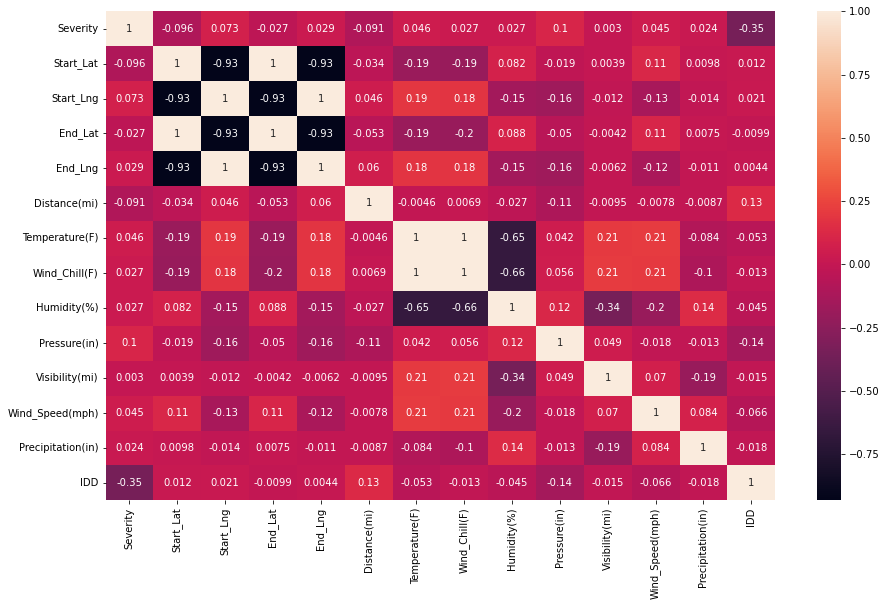

In [17]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [18]:
cities = df1['City'].unique()
len(cities)

1269

In [19]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

Los Angeles                 156491
Sacramento                   66264
San Diego                    55504
San Jose                     34531
Riverside                    26317
                             ...  
Shoshone                         1
Holtville                        1
South Santa Clara Valley         1
Heber                            1
West Santa Cruz                  1
Name: City, Length: 1268, dtype: int64

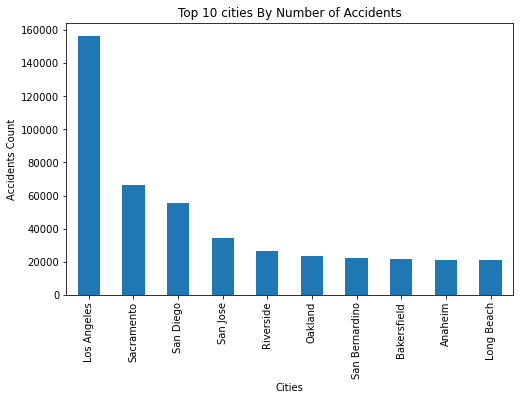

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [22]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity


Severity
1      10284
2    1445833
3     271814
4      13502
Name: ID, dtype: int64

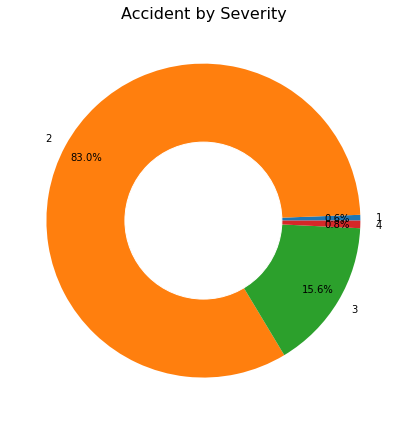

In [23]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [24]:
df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [25]:
df1['Start_Time'][2408]

Timestamp('2016-07-07 16:34:34')

In [26]:
df1['End_Time'][2408]

Timestamp('2016-07-07 17:49:34')

In [27]:
df1['start_date'] = [d.date() for d in df1['Start_Time']]
df1['start_time'] = [d.time() for d in df1['Start_Time']]

In [28]:
df1['end_date'] = [d.date() for d in df1['End_Time']]
df1['end_time'] = [d.time() for d in df1['End_Time']]

In [29]:
df1['end_time']

728        11:04:40
729        11:16:39
730        11:19:14
731        11:11:42
732        11:04:16
             ...   
7728389    18:32:01
7728390    19:38:23
7728391    19:28:49
7728392    19:29:42
7728393    19:21:31
Name: end_time, Length: 1741433, dtype: object

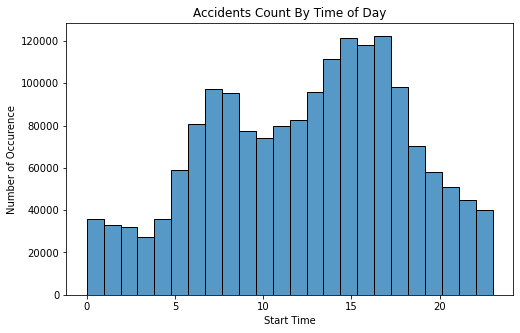

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

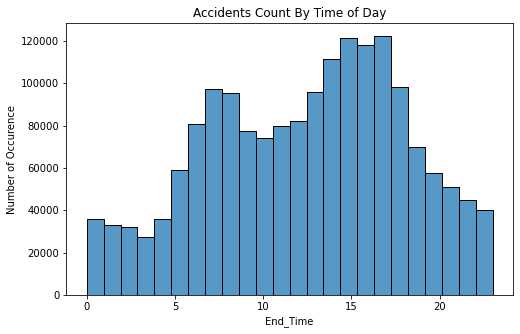

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()